<a href="https://colab.research.google.com/github/Ranjita2022/Dental-Cavity-Detection-Using-Instance-Segmentation-and-Object-detection/blob/main/yolo11_is.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

In [ ]:
!nvidia-smi

Sun Dec 22 17:26:44 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLO11 via Ultralytics

In [ ]:
%pip install "ultralytics<=8.3.40" supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.7/112.6 GB disk)


## Inference with model pre-trained on COCO dataset

In [ ]:
import supervision as sv

detections = sv.Detections.from_ultralytics(result)

## Fine-tune YOLO11 on custom dataset

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets
!pip install roboflow

from google.colab import userdata
from roboflow import Roboflow

rf = Roboflow(api_key="Koi82FVGT15aaXykc6GF")
project = rf.workspace("mldplproject").project("newmlproj")
version = project.version(1)
dataset = version.download("yolov11")

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to NewMLProj-1 in yolov11:: 100%|██████████| 5004/5004 [00:00<00:00, 5286.54it/s]


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s-seg.pt data={dataset.location}/data.yaml epochs=25 imgsz=640 plots=True

/content
100% 19.7M/19.7M [00:00<00:00, 88.2MB/s]
WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
New https://pypi.org/project/ultralytics/8.3.53 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolo11s-seg.pt, data=/content/datasets/NewMLProj-1/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=3

**NOTE:** The results of the completed training are saved in `{HOME}/runs/detect/train/`. Let's examine them.

In [ ]:
!ls {HOME}/runs/segment/train/

args.yaml					    MaskF1_curve.png	 train_batch1.jpg
BoxF1_curve.png					    MaskP_curve.png	 train_batch2.jpg
BoxP_curve.png					    MaskPR_curve.png	 val_batch0_labels.jpg
BoxPR_curve.png					    MaskR_curve.png	 val_batch0_pred.jpg
BoxR_curve.png					    results.csv		 val_batch1_labels.jpg
confusion_matrix_normalized.png			    results.png		 val_batch1_pred.jpg
confusion_matrix.png				    train_batch0.jpg	 val_batch2_labels.jpg
events.out.tfevents.1734889664.51324fbb6061.7019.0  train_batch1875.jpg  val_batch2_pred.jpg
labels_correlogram.jpg				    train_batch1876.jpg  weights
labels.jpg					    train_batch1877.jpg


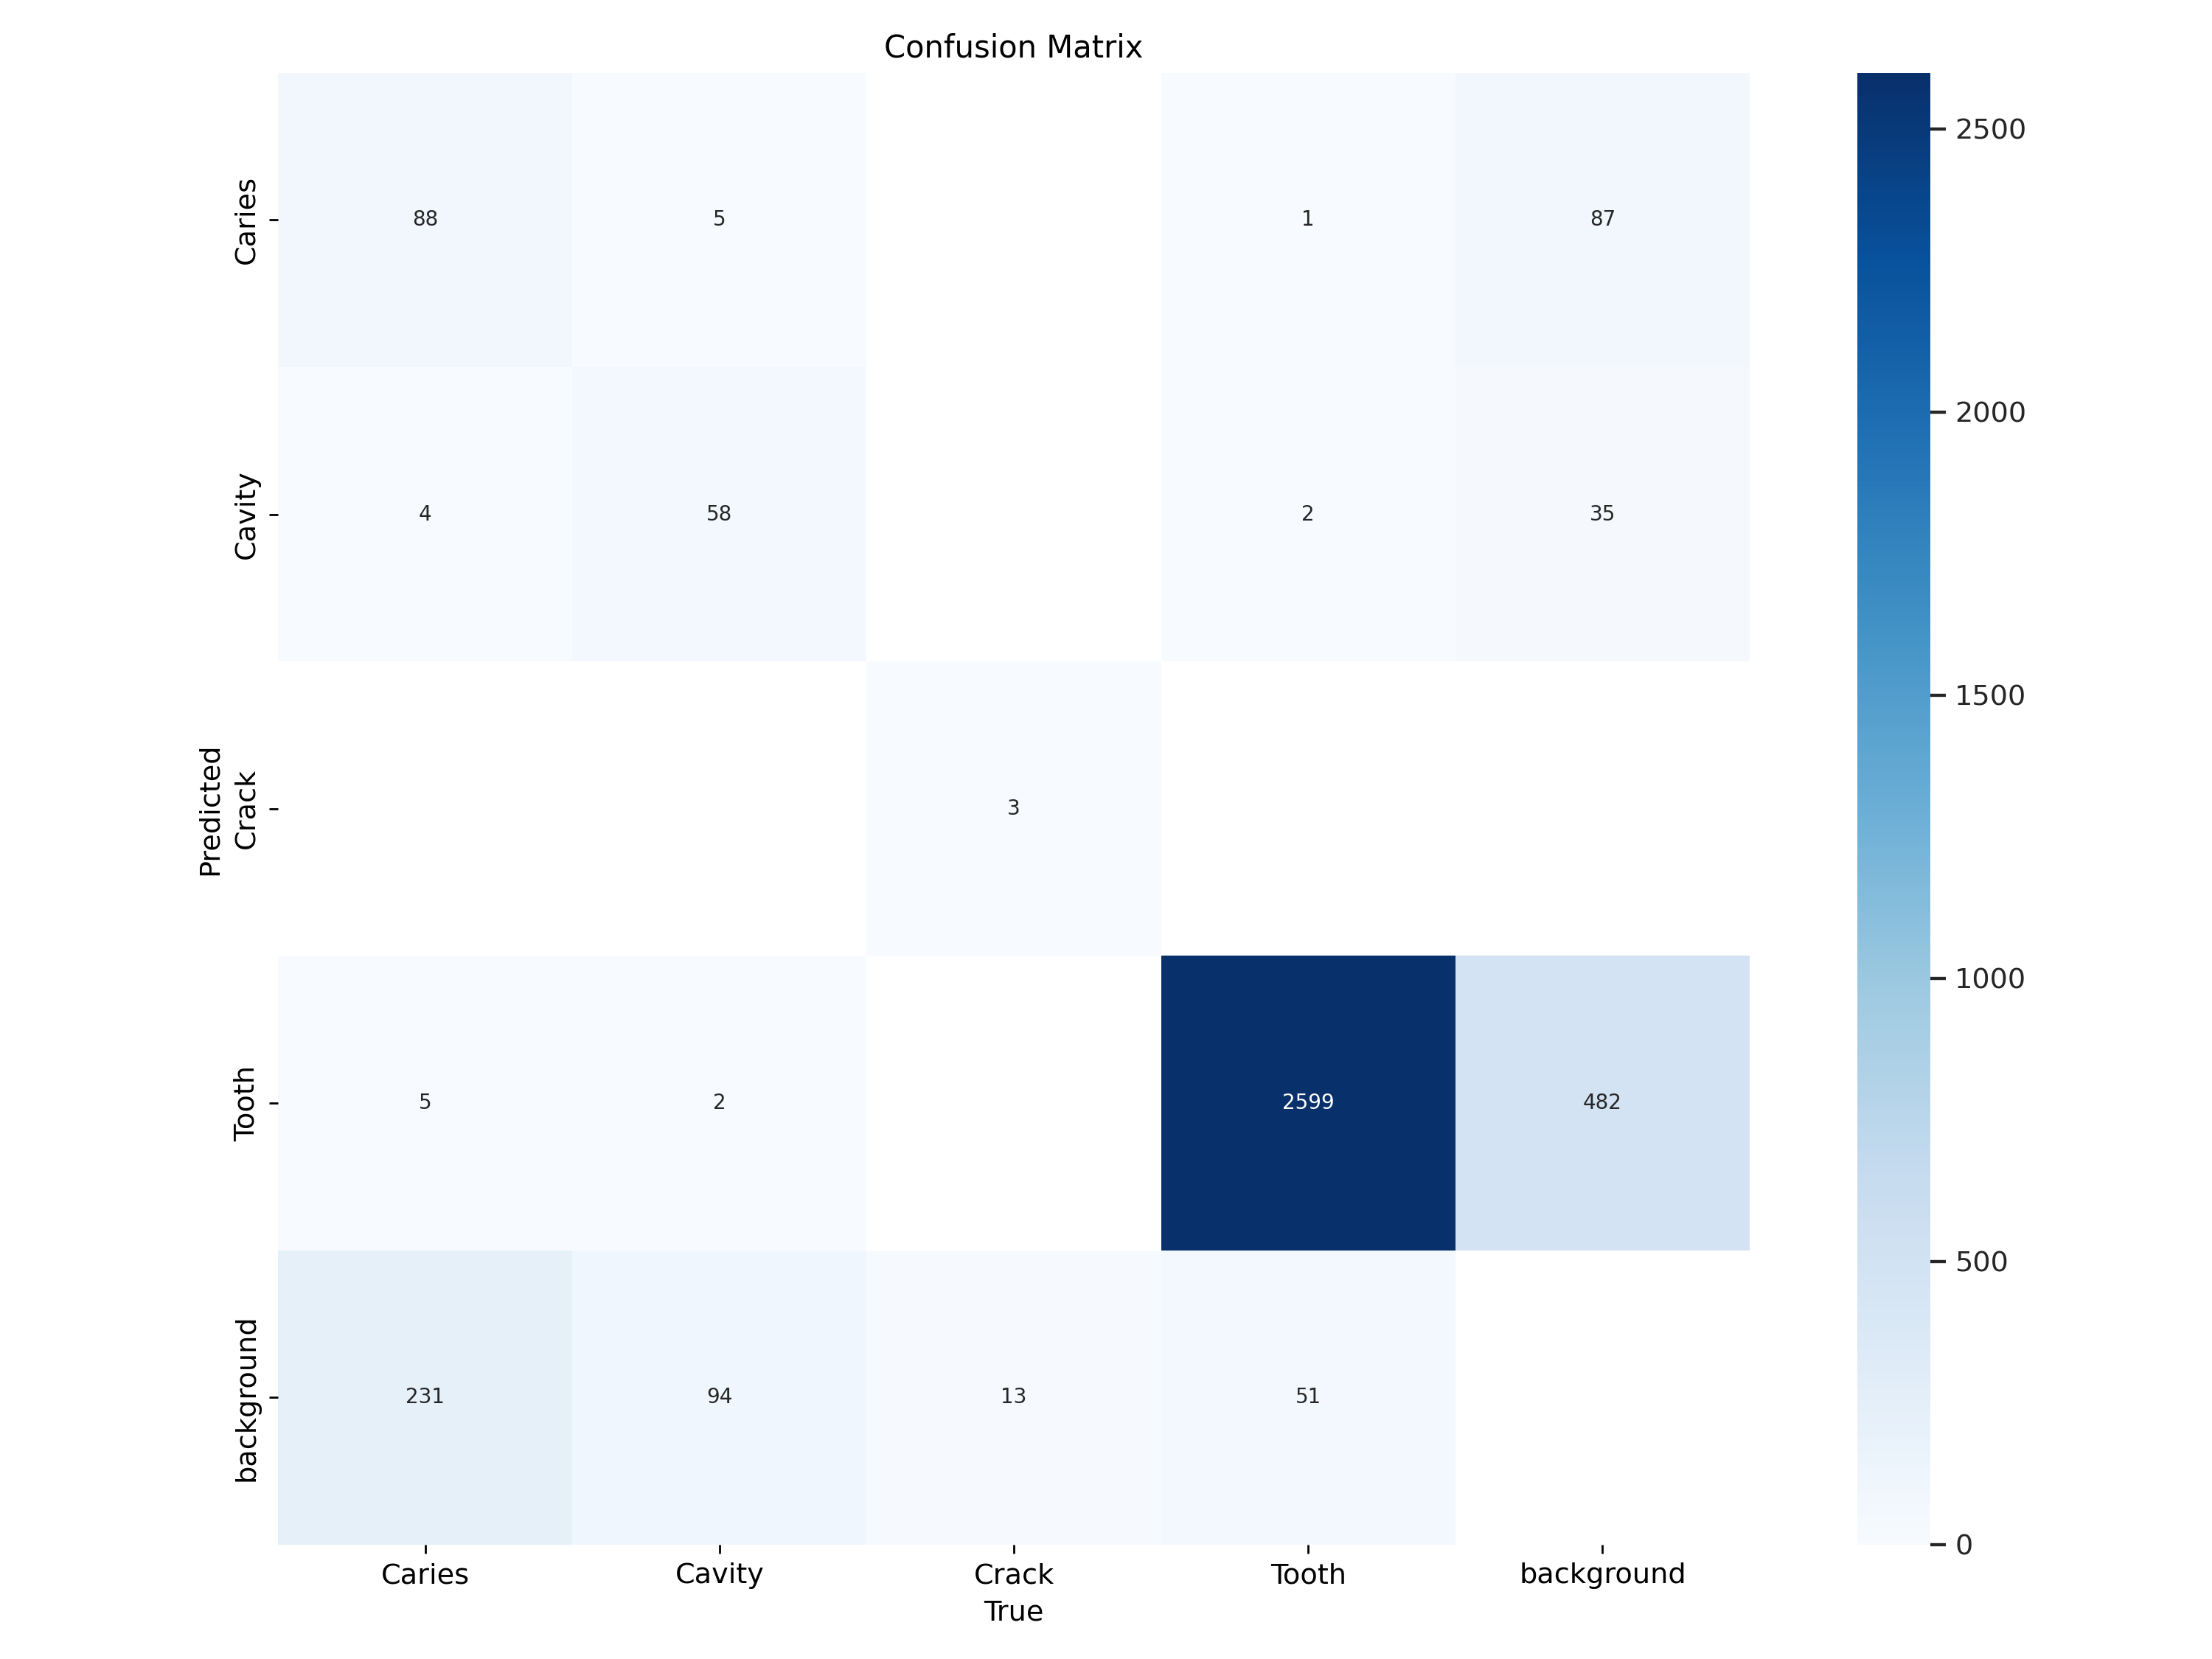

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=600)

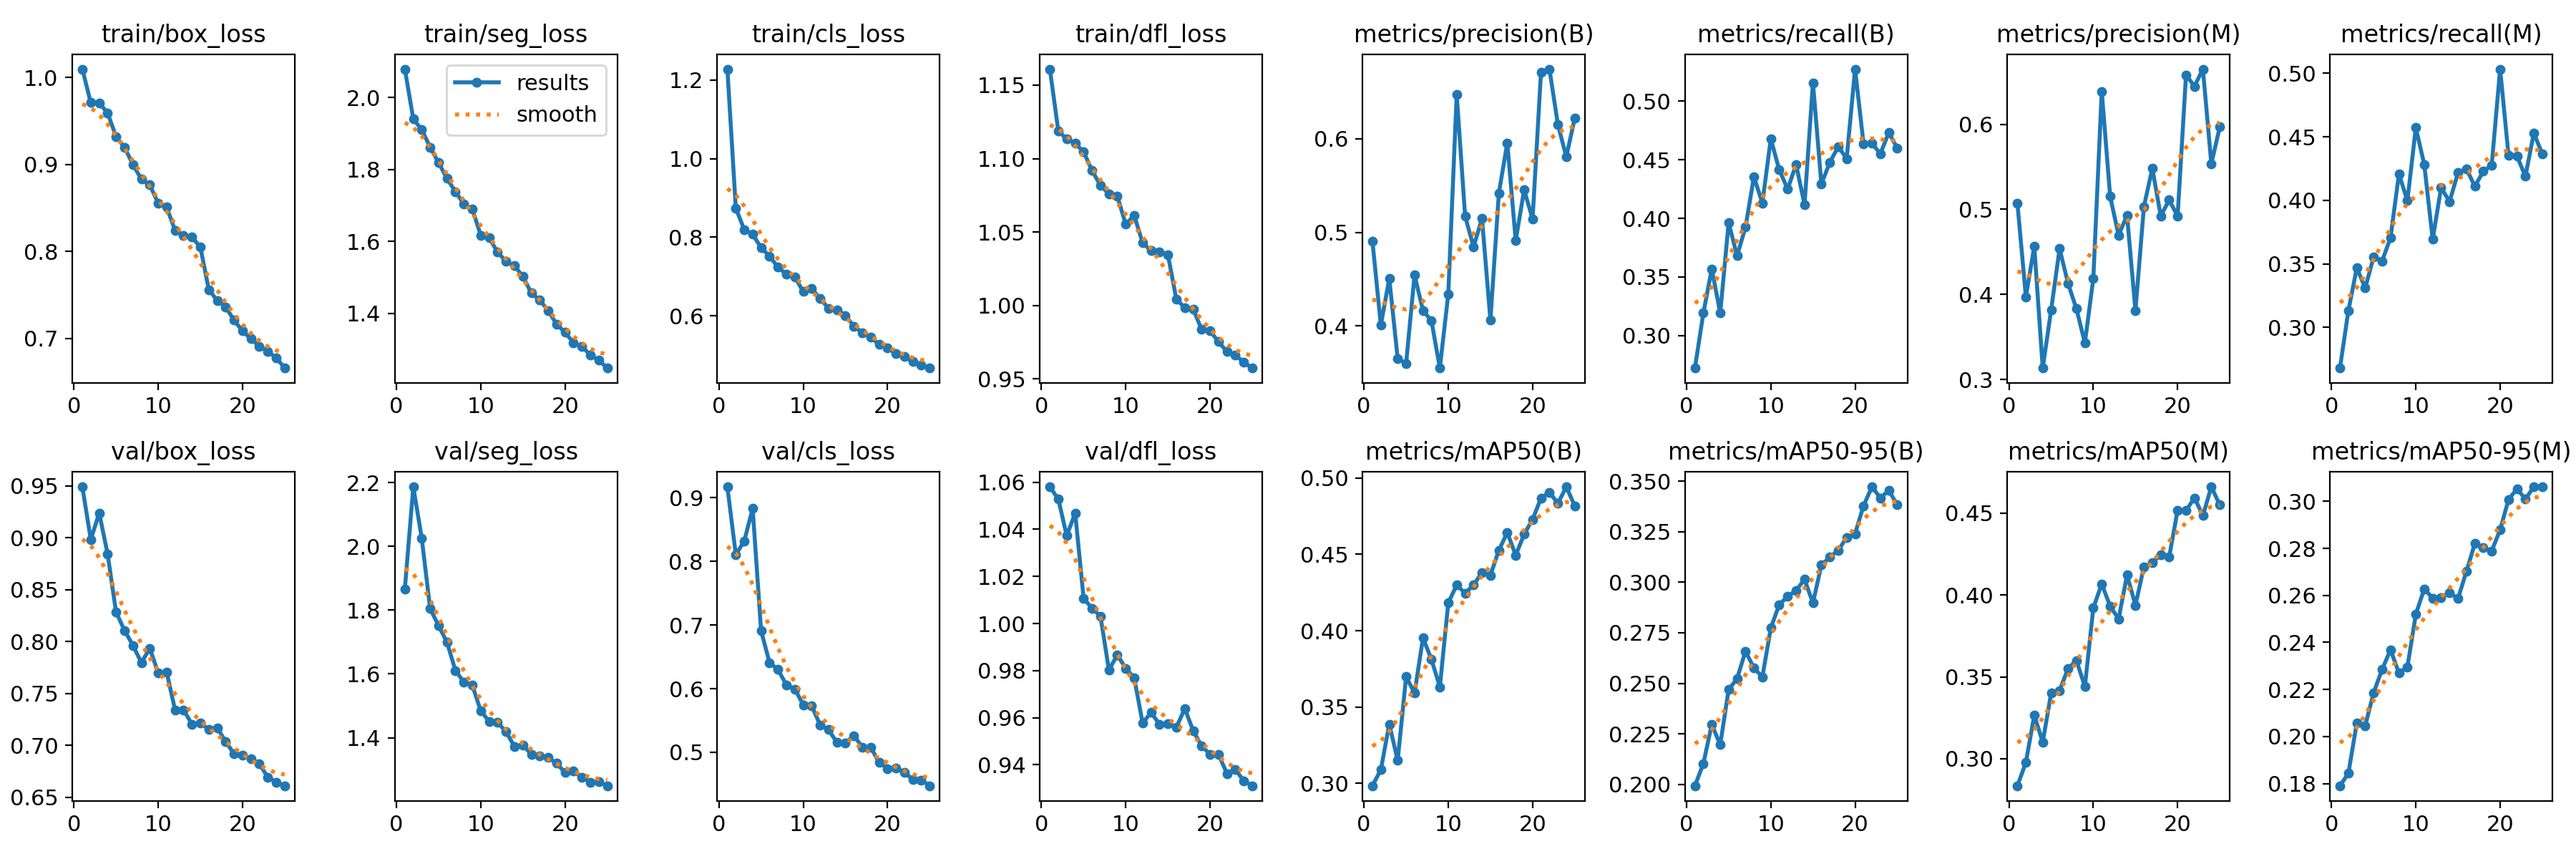

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/segment/train/results.png', width=600)

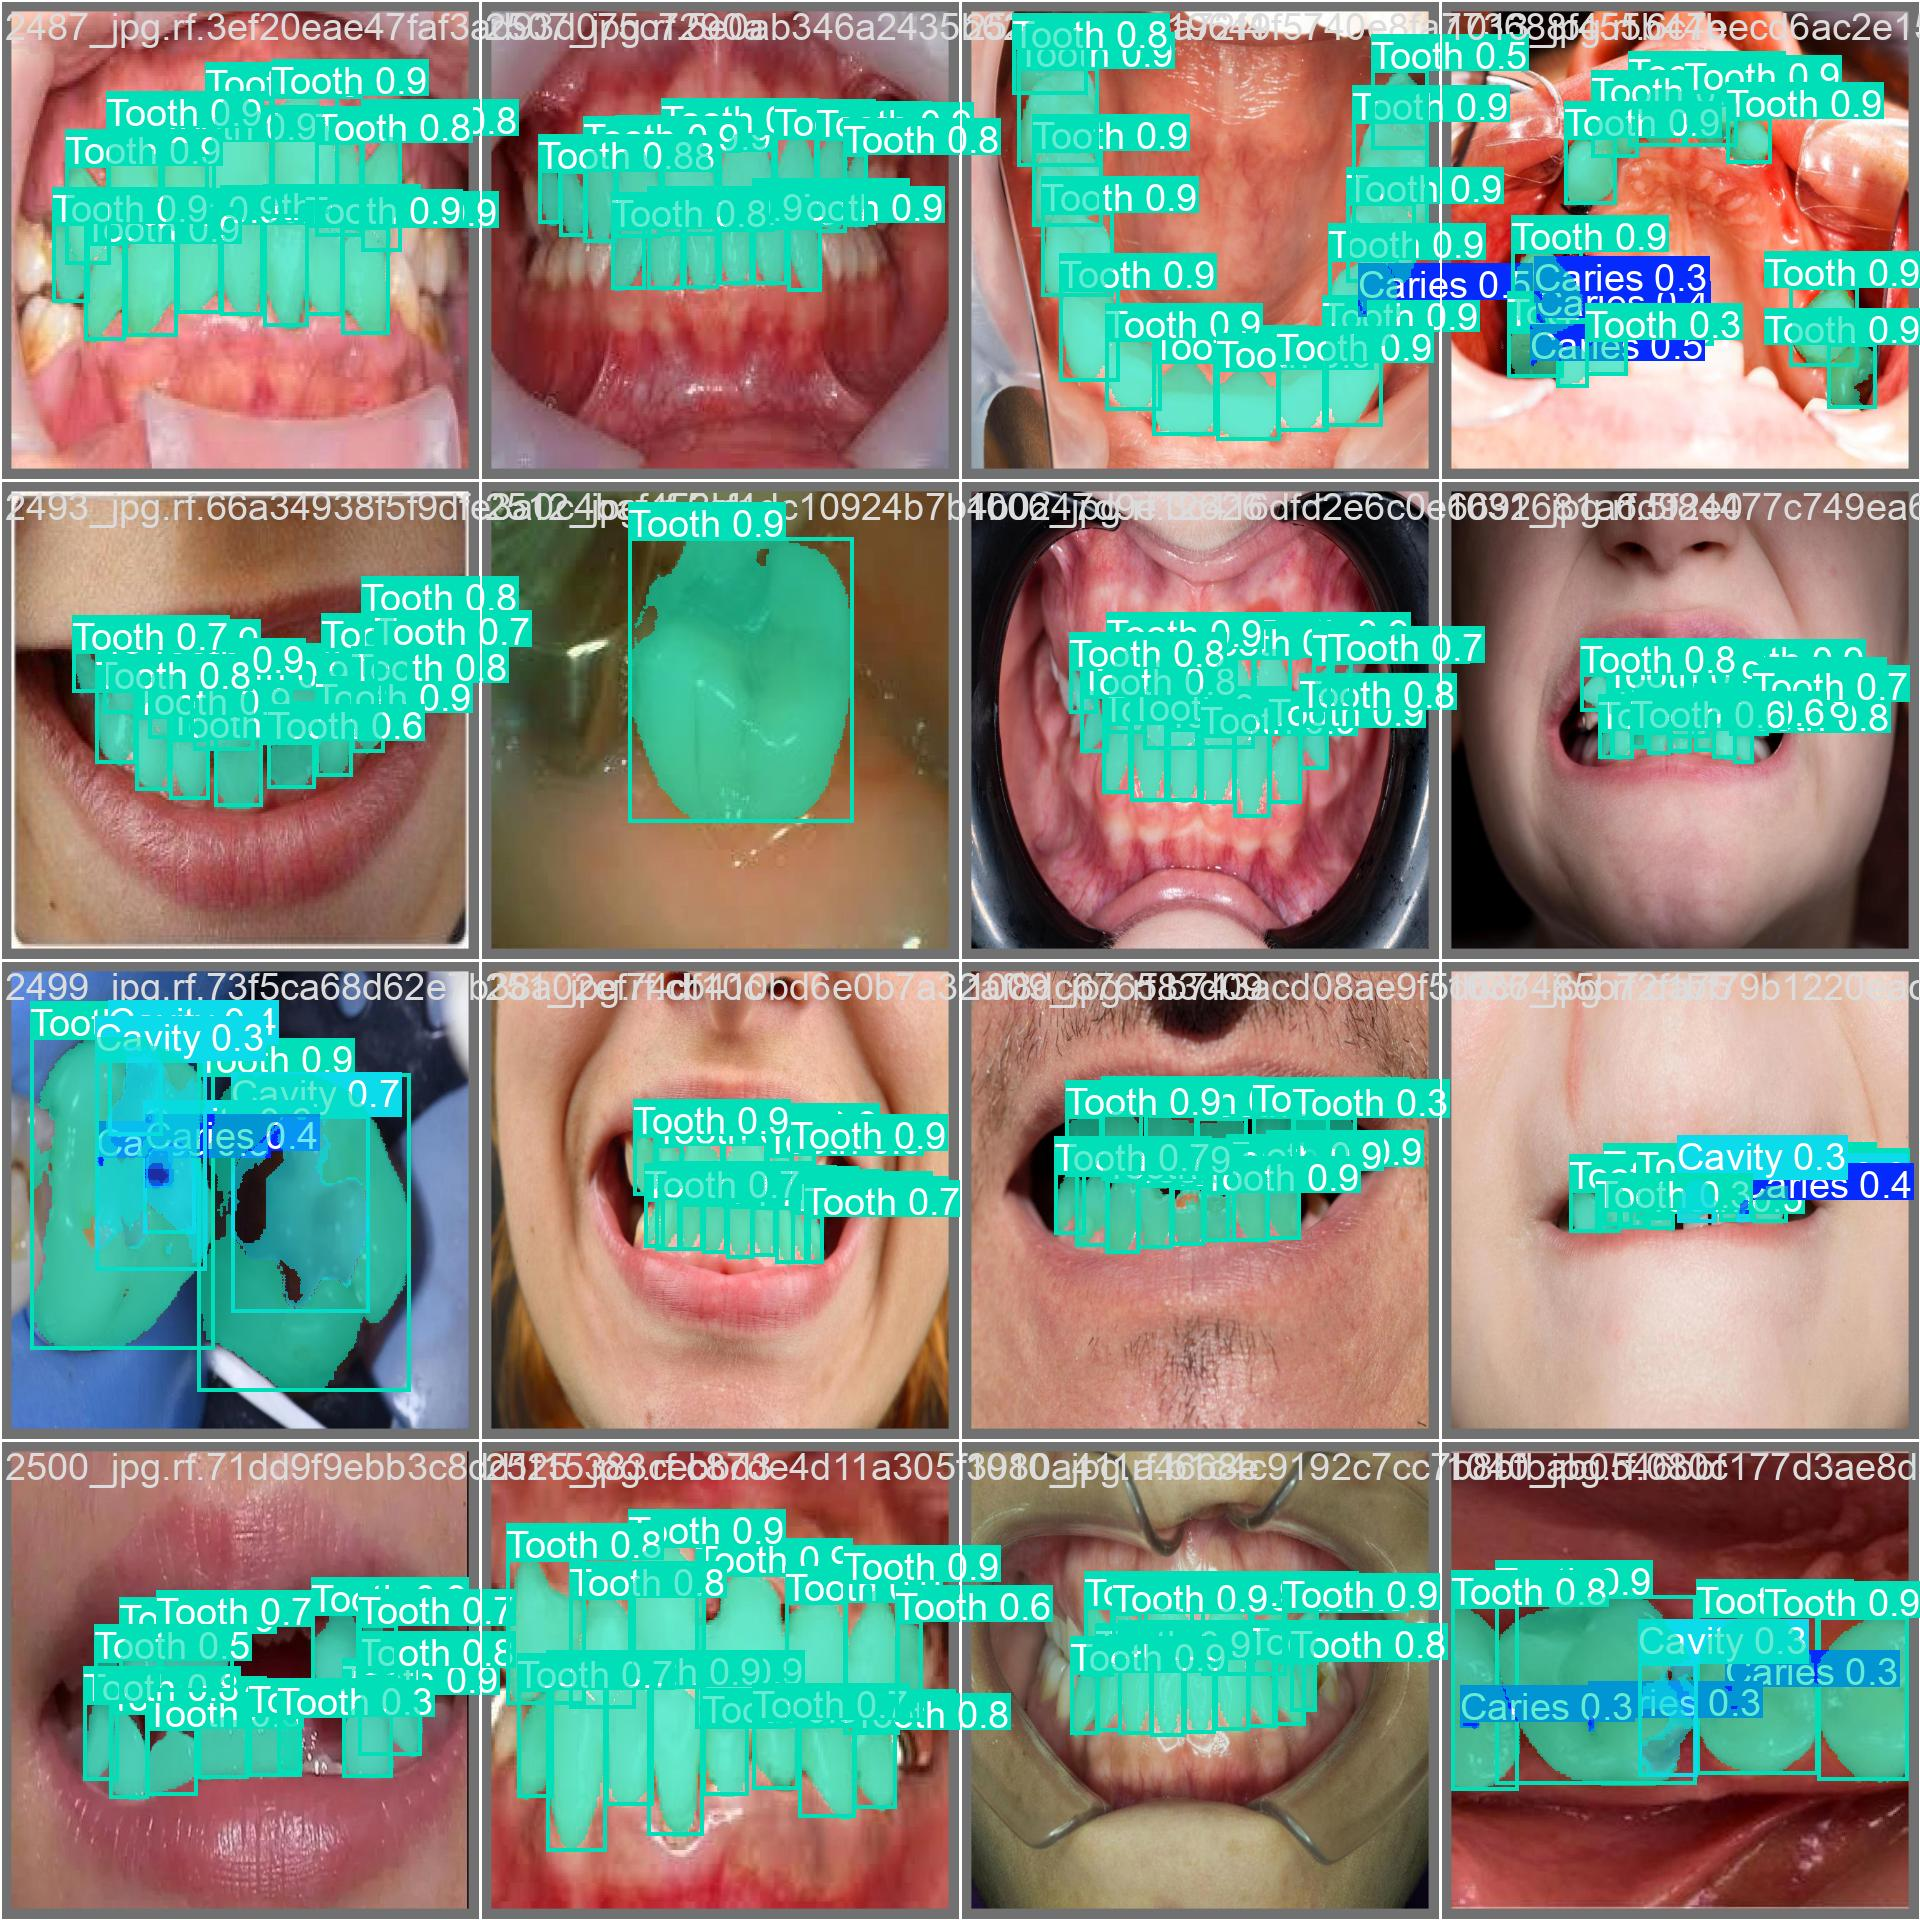

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg', width=600)

## Validate fine-tuned model

In [ ]:
!yolo task=detect mode=val model={HOME}/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s-seg summary (fused): 265 layers, 10,068,364 parameters, 0 gradients, 35.3 GFLOPs
val: Scanning /content/datasets/NewMLProj-1/valid/labels.cache... 254 images, 0 backgrounds, 0 corrupt: 100% 254/254 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 16/16 [00:09<00:00,  1.62it/s]
                   all        254       3156      0.576      0.473      0.494      0.346      0.553      0.449      0.462      0.304
                Caries        102        328      0.433      0.302      0.284      0.136      0.405      0.277      0.275      0.104
                Cavity         85        159      0.518      0.421      0.395      0.209      0.447      0.358       0

## Inference with custom model

In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s-seg summary (fused): 265 layers, 10,068,364 parameters, 0 gradients, 35.3 GFLOPs

image 1/250 /content/datasets/NewMLProj-1/test/images/1012_jpg.rf.c16bf957ca3aaa05488f92536076a078.jpg: 640x640 19 Cariess, 4 Tooths, 20.2ms
image 2/250 /content/datasets/NewMLProj-1/test/images/103_jpg.rf.efafdaf75b331864ffb1602e70550892.jpg: 640x640 16 Tooths, 20.2ms
image 3/250 /content/datasets/NewMLProj-1/test/images/1047_jpg.rf.dfb10f0dcc6a4492fb86fd9e99e0b89f.jpg: 640x640 1 Cavity, 1 Tooth, 20.1ms
image 4/250 /content/datasets/NewMLProj-1/test/images/1048_jpg.rf.00d01c39fe745a20e12b2d6b4d5b0acd.jpg: 640x640 3 Cariess, 1 Cavity, 8 Tooths, 20.1ms
image 5/250 /content/datasets/NewMLProj-1/test/images/1052_jpg.rf.fcc58dcc863fef7499208abda7104335.jpg: 640x640 2 Cariess, 1 Cavi

**NOTE:** Let's take a look at few results.

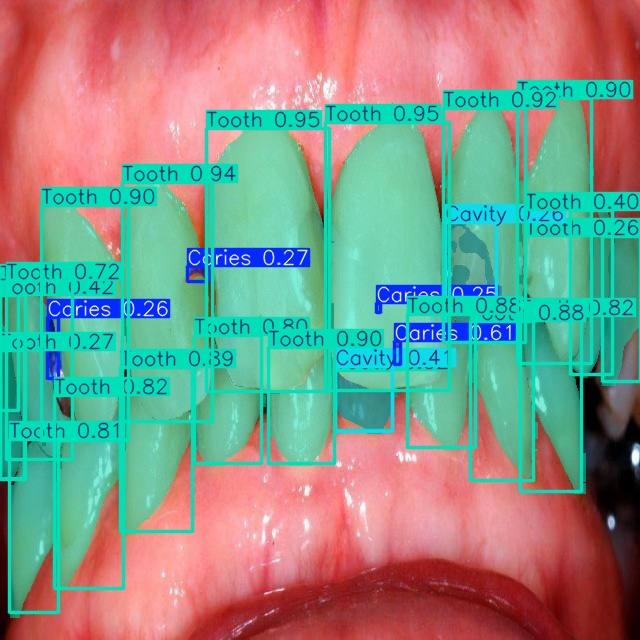

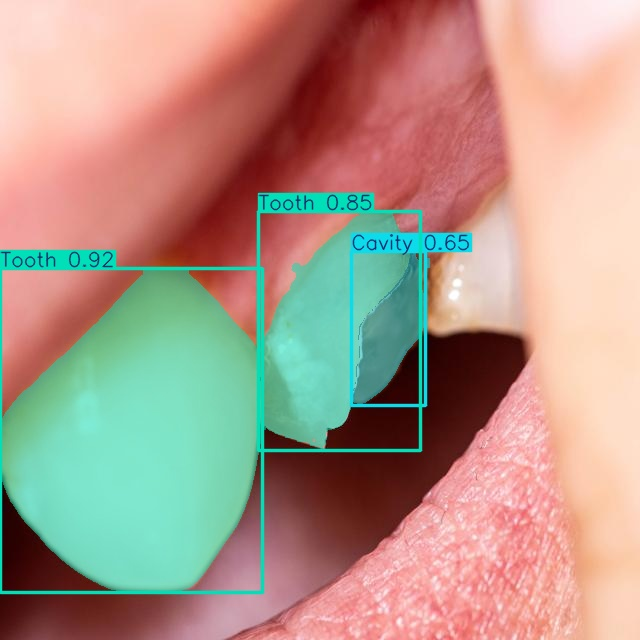

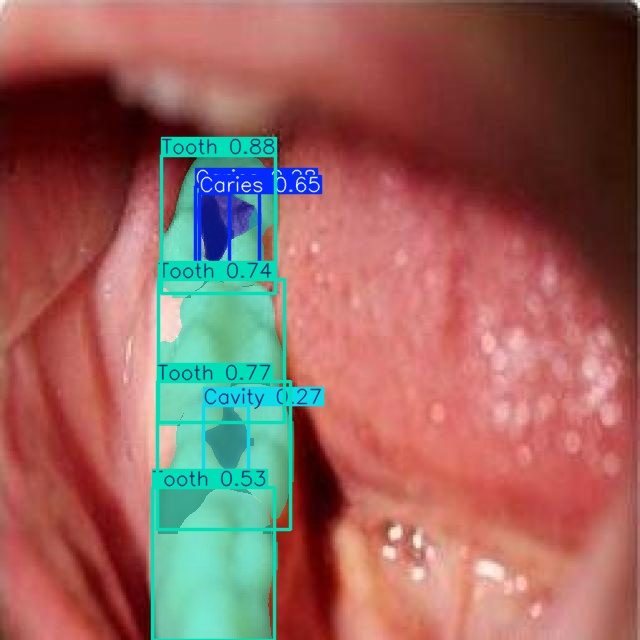

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'{HOME}/runs/segment/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [ ]:
!ls runs/segment/predict3

1012_jpg.rf.c16bf957ca3aaa05488f92536076a078.jpg  2423_jpg.rf.7dc6a7d977de4cc84b2f3b36ef23c003.jpg
103_jpg.rf.efafdaf75b331864ffb1602e70550892.jpg   2447_jpg.rf.d7c95503b806f0537f424644044c1734.jpg
1047_jpg.rf.dfb10f0dcc6a4492fb86fd9e99e0b89f.jpg  2449_jpg.rf.4b923dcb231d6679baf860d7ed0b0b67.jpg
1048_jpg.rf.00d01c39fe745a20e12b2d6b4d5b0acd.jpg  2453_jpg.rf.b83afbed600bc6f0e310799fe39c7f4e.jpg
1052_jpg.rf.fcc58dcc863fef7499208abda7104335.jpg  2459_jpg.rf.00c06b38e0e9f321e56bbd74dc55b2d4.jpg
1070_jpg.rf.ce9e3061b40a371558605f931d1261a7.jpg  247_jpg.rf.a9269cb4435a0f2bbc85d45dc5ea8cd7.jpg
107_jpg.rf.2fe0f5125e161bf0c0c872282294834e.jpg   249_jpg.rf.c799ed2467d9c1113cd423af3958f571.jpg
1082_jpg.rf.2852a2630202d8b2dfea62b16a9ac498.jpg  250_jpg.rf.e29ad3155840c5a0b6768c5f5a3d525c.jpg
1084_jpg.rf.cff7d394f5f76ae83a88068ef0f0b196.jpg  2519_jpg.rf.9da0bb41423889612123c48b06d46d1a.jpg
1086_jpg.rf.27926dd10be4cc1bc343305957fa9a45.jpg  2615_jpg.rf.b877412aa4e9c7b1b924ceb6ef859f77.jpg
1099_jpg.rf.d

/content/runs/segment/predict3/2175_jpg.rf.b584a721b304ff5ac961a8d891939707.jpg


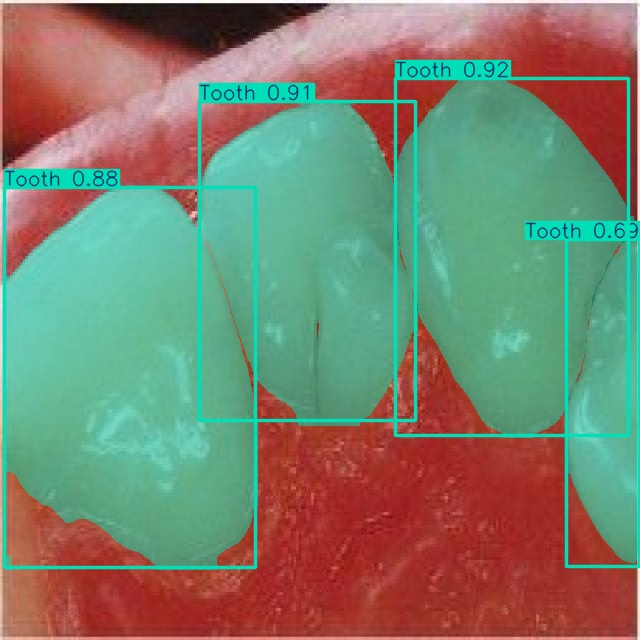

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'{HOME}/runs/segment/predict3/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[17:18]:
    print(img)
    display(IPyImage(filename=img, width=600))
    print("\n")

In [ ]:
!ls /content/runs/segment/predict3/2175_jpg.rf.b584a721b304ff5ac961a8d891939707.jpg

/content/runs/segment/predict3/2175_jpg.rf.b584a721b304ff5ac961a8d891939707.jpg


In [ ]:
from ultralytics import YOLO
from PIL import Image
import requests

model = YOLO(f'{HOME}/runs/segment/train/weights/best.pt')
image = Image.open("/content/runs/segment/predict3/2175_jpg.rf.b584a721b304ff5ac961a8d891939707.jpg")
result = model.predict(image, conf=0.25)[0]


0: 640x640 2 Tooths, 20.2ms
Speed: 2.0ms preprocess, 20.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
import supervision as sv

detections = sv.Detections.from_ultralytics(result)

In [ ]:
# Rename classes
name_dictionary = {
    "SUORCIL": "SOURCIL",
    "SAKRO-ILIAK-EKLEM": "SACROILIAC-JOINT",
    "ILIAK": "ILIUM"
}
detections.data["class_name"] = [name_dictionary.get(class_name, class_name) for class_name in detections.data["class_name"]]

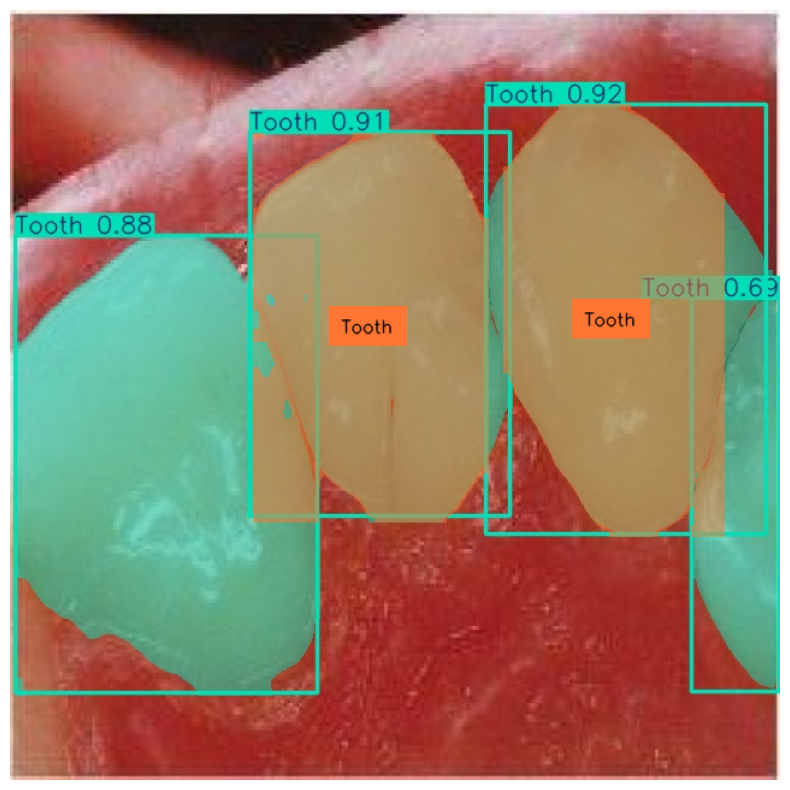

In [ ]:
mask_annotator = sv.MaskAnnotator()
label_annotator = sv.LabelAnnotator(text_color=sv.Color.BLACK, text_position=sv.Position.CENTER)

annotated_image = image.copy()
mask_annotator.annotate(annotated_image, detections=detections)
label_annotator.annotate(annotated_image, detections=detections)

sv.plot_image(annotated_image, size=(10, 10))